In [1]:
import os
os.chdir('..\\') # in ./tests folder - so changing to parent folder for imports

from consts import FOLDER2FLOW_RESULTS
import pandas as pd
import pprint
import matplotlib.pyplot as plt
from IPython.display import display


In [19]:
class df_extra:    
    def __init__(self, df):
        self.df = df
        self.num_rows = df.shape[0]
        self.data_dict = {}

    def add_data_to_df(self, col_name, data):
        self.data_dict[col_name] = [data]*self.num_rows
        self.df[col_name] = data

def create_united_df(date_folder, timelimit=600): # This is a df of all networks in folder
    res_dp = os.path.join(FOLDER2FLOW_RESULTS, date_folder)
    dfs_list = []
    for network in sorted(os.listdir(res_dp), reverse=True):
        df_fp = os.path.join(res_dp, network, "results.df")
        if network.endswith(".log") or not os.path.exists(df_fp):
            continue
        print(network)
        df = pd.read_pickle(df_fp)

        _df_extra = df_extra(df)
        _df_extra.add_data_to_df("network", network)
        _df_extra.add_data_to_df("mu", network.split("_")[1])

        dfs_list.append(df)
    df = pd.concat(dfs_list)
    df.reset_index(inplace=True)
    del df["index"]
    
    # replace names to shorter names for readabilty
    df["algo"].replace(f"Neumann-ILP-100-TimeLimit-{timelimit}", "NLP100", inplace=True)
    df["algo"].replace(f"Neumann-ILP-150-TimeLimit-{timelimit}", "NLP150", inplace=True)
    df["algo"].replace(f"Neumann-ILP-200-TimeLimit-{timelimit}", "NLP200", inplace=True)
    
    return df

def prepare_data_for_plot(df):
    evals = ["avg_modularity", "std_modularity", "avg_jaccard", "std_jaccard"]
    mus = ["all", "0.4", "0.5", "0.6"]
    evals_dict = {}

    for mu in mus:
        evals_dict[mu] = {}
        for _eval in evals:
            evals_dict[mu][_eval] = {}

    for algo in df.algo.unique():
        for mu, evals in evals_dict.items():
    #         print(algo, mu)
            if mu == "all":
                algo_rows = df.loc[df["algo"]==algo]
            else:
                algo_rows = df.loc[df["algo"]==algo].loc[df["mu"]==mu]

            avg_modularity = algo_rows["modularity - algo"].mean()
            std_modularity = algo_rows["modularity - algo"].std()
            avg_jaccard = algo_rows["jaccard"].mean()
            std_jaccard = algo_rows["jaccard"].std()

            evals["avg_modularity"][algo] = avg_modularity
            evals["std_modularity"][algo] = std_modularity
            evals["avg_jaccard"][algo] = avg_jaccard
            evals["std_jaccard"][algo] = std_jaccard
    return evals_dict


def create_plots(data_for_plot):
    for mu, mu_evals in data_for_plot.items():
        for eval_name, eval_data in mu_evals.items():
            fig, ax = plt.subplots()
            ax.set_title(f'{eval_name}, mu={mu}')
            x = eval_data.values()
            y = eval_data.keys()
            ax.plot(y, x)
            ax.axhline(y=list(x)[0], color='r', linestyle='--')
            
            
def run_visu(date_folder):
    df = create_united_df(date_folder, timelimit=1200)
    display(df)
    data_for_plots = prepare_data_for_plot(df)
    create_plots(data_for_plots)

1000_0.6_9
1000_0.6_8
1000_0.6_7
1000_0.6_6


,algo,modularity - real,modularity - algo,jaccard,graph_conductance,graph_sensitivity,graph_accuracy,num communities - real,num communities - algo,num_coms_divided,num_coms_skipped,time-sec,network,mu
0,Newman,0.363148,0.318980,0.148809,0.449291,0.840,0.501996,30,8,NaN,NaN,0.509564,1000_0.6_9,0.6
1,Louvain,0.363148,0.359352,0.550375,0.412986,0.964,0.833115,30,20,NaN,NaN,0.138791,1000_0.6_9,0.6
2,NLP100,0.363148,0.319282,0.150730,0.440722,0.841,0.518768,30,9,1.0,4.0,16.766607,1000_0.6_9,0.6
3,NLP150,0.363148,0.318968,0.145327,0.453937,0.840,0.488426,30,8,1.0,2.0,2617.119222,1000_0.6_9,0.6
4,NLP200,0.363148,0.324659,0.171148,0.441561,0.846,0.524357,30,9,2.0,0.0,1055.639063,1000_0.6_9,0.6
5,Newman,0.362887,0.322315,0.180772,0.428696,0.814,0.533760,28,10,NaN,NaN,0.848740,1000_0.6_8,0.6
6,Louvain,0.362887,0.358645,0.641090,0.405844,0.942,0.869728,28,22,NaN,NaN,0.162166,1000_0.6_8,0.6
7,NLP100,0.362887,0.334305,0.253954,0.409590,0.842,0.620996,28,13,2.0,4.0,42.084931,1000_0.6_8,0.6
8,NLP150,0.362887,0.327744,0.220812,0.417208,0.839,0.600641,28,12,3.0,2.0,827.040688,1000_0.6_8,0.6
9,NLP200,0.362887,0.322794,0.190098,0.422190,0.814,0.559085,28,11,2.0,0.0,909.273849,1000_0.6_8,0.6


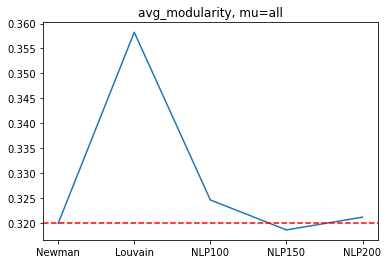

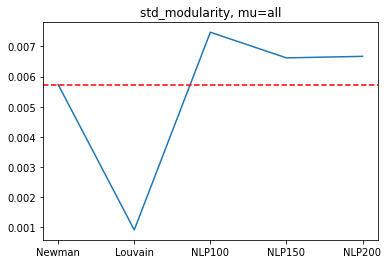

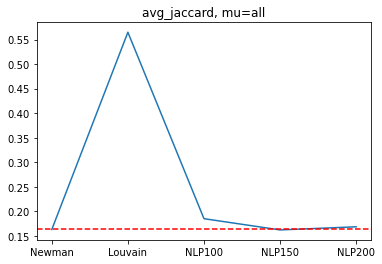

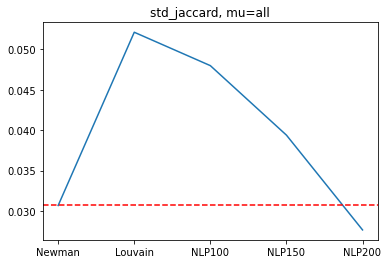

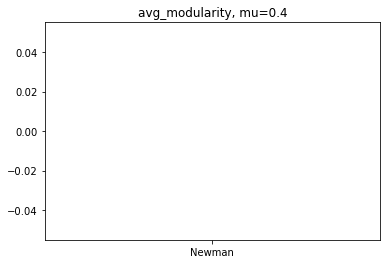

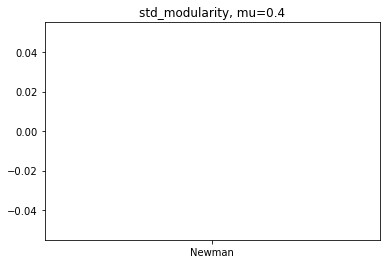

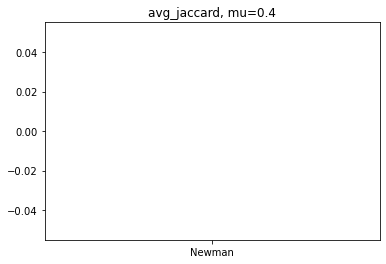

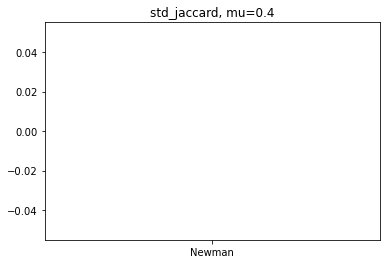

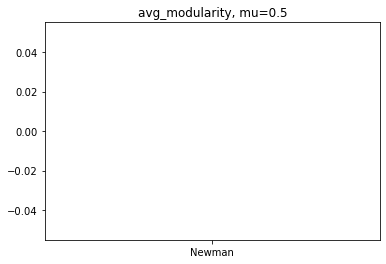

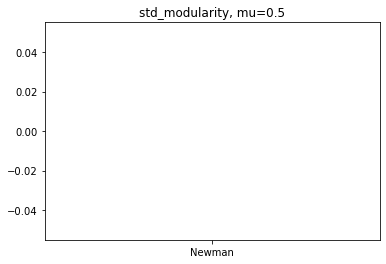

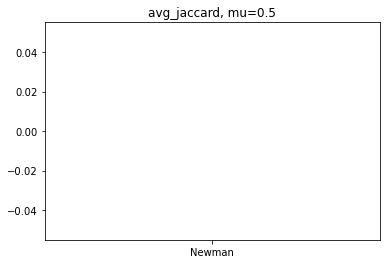

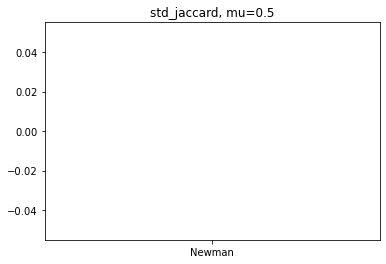

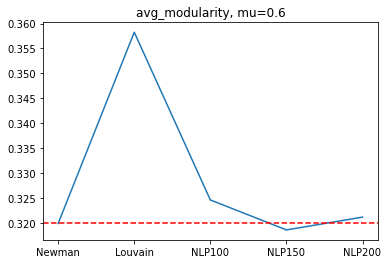

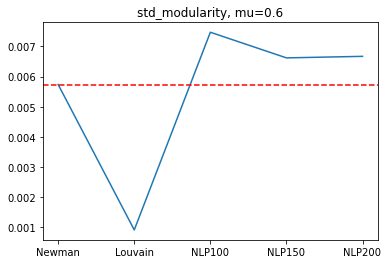

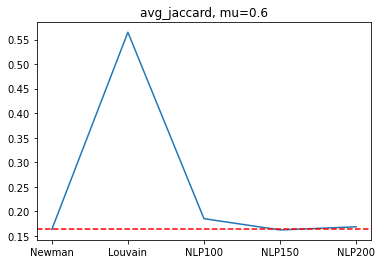

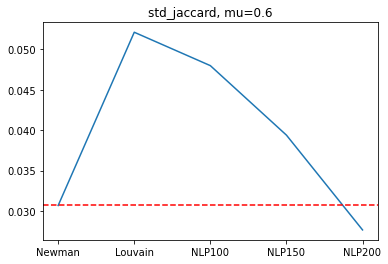

In [20]:
date_folder = "17-05-2022--13-36-06"
run_visu(date_folder)